In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist, squareform
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet, fcluster
from astropy.stats import biweight_midcorrelation 
from scipy.stats import linregress,moment
from scipy.interpolate import interp1d

%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

In [11]:
sns.set(context='paper', style="whitegrid", palette='dark', font='sans-serif:Arial', font_scale=1, color_codes=False, rc=None)
sns.set_style("ticks", {"xtick.major.size": 3, "ytick.major.size": 3})
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":12,"axes.labelsize":12})   

In [12]:
# Load in pathway dict

import pickle
def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)
    
# Pathway dict using Cobra
#Pathway_dict = load_obj('/Users/niudu/Library/Mobile Documents/com~apple~CloudDocs/Dissertation/Jupyter_notebook/System_bio/Annotation/PT3_pathway.pkl')

# Pathway dict using Flip's data
# Pathway_dict = load_obj('/Users/niudu/Library/Mobile Documents/com~apple~CloudDocs/Dissertation/Jupyter_notebook/System_bio/Annotation/PT3_pathway_Flip.pkl')

#Pathway annotation using Sarah's data plus Nymark 2009
PT3_DN_Group = pd.read_csv('/Users/niudu/Library/Mobile Documents/com~apple~CloudDocs/Dissertation/Jupyter_notebook/System_bio/Annotation/PT3_Annotation_DN_090617_merged.csv')
PT3_DN_Group = PT3_DN_Group.set_index('Pt3_ID')

In [13]:
# Connectivity: Gene connectivity K= row sum of the adjacency matrix=number of direct neighbors
# Unweighted network, convert data_dist (adjacency) to binary matrix
def K_binary(data_dist,tau): # threshold for connectivity tau in [0,1]
    temp = np.where(data_dist>tau,1,data_dist)
    return sum(np.where(data_dist<tau,0,temp))

def Finding_tau(data_dist,tau = 0.4, bins = 20): # test tau starting from 0.5
    tau_tested = []
    GOF = []
    mean_K = []
    for test_tau in np.linspace(tau,0.95,10):
        tau_tested.append(test_tau)
        K_unweighted = K_binary(data_dist,test_tau)
        mean_K.append(np.mean(K_unweighted))
        hist_data= plt.hist(K_unweighted,bins = bins)
        p_K = hist_data[0]/sum(hist_data[0])
        fitting = linregress(np.log10(hist_data[1][1:]),np.log10(p_K))
        GOF.append(fitting.rvalue**2)
        plt.close()
    return tau_tested,GOF,mean_K

In [14]:
# Function to find key by value
def find_key(input_dict, value):
     return next((k for k, v in input_dict.items() if value in v), None)

In [15]:
# counting method, backup no use maybe
unique, counts = np.unique(B, return_counts=True)

NameError: name 'B' is not defined

In [16]:
# Import data
'''
Flip experiment design 

NH4+ -- growth to exponential, sample and transfer

N-free wash and incubation 2 h, sample

Add NO3-, sample at 3, 18, 42 66 90 114, 138, 162, 228  hours

NO3- depleted from media between 3 and 18 h (NO3 uptake analysis);
18 to 42 h cells “sense” onset of N-limitation (NO3 uptake analysis and transcriptome results);
66 – 228 h, N-stress response (transcriptome results).  '''


Sara_data = pd.read_csv('./Chapter_I_modeling/Transcript/Sara_table_simple.csv')
# Sarah_data_repeat = pd.read_csv('./Chapter_I_modeling/Transcript/Sarah_data_repeat.csv')
#Flip_WT_data = pd.read_csv('./Chapter_I_modeling/Transcript/Flip_transcriptome_data.csv')
#Flip_NR_data = pd.read_csv('./Chapter_I_modeling/Transcript/Flip_NR_KO_trans.csv')



In [519]:
# Flip data

'''Flip_WT = Flip_WT_data[['Pt3_ID', 'DS2_WT_N-free_A', 'DS2_WT_1h_A',
       'DS2_WT_18h_A', 'DS2_WT_42h_A', 'DS2_WT_66h_A', 'DS2_WT_90h_A',
       'DS2_WT_114h_A', 'DS2_WT_138h_A', 'DS2_WT_162h_A', 'DS2_WT_228h_A']]

Flip_WT= Flip_WT[Flip_WT.mean(axis = 1)>10].set_index('Pt3_ID')
Gene_id = Flip_WT.index'''

"Flip_WT = Flip_WT_data[['Pt3_ID', 'DS2_WT_N-free_A', 'DS2_WT_1h_A',\n       'DS2_WT_18h_A', 'DS2_WT_42h_A', 'DS2_WT_66h_A', 'DS2_WT_90h_A',\n       'DS2_WT_114h_A', 'DS2_WT_138h_A', 'DS2_WT_162h_A', 'DS2_WT_228h_A']]\n\nFlip_WT= Flip_WT[Flip_WT.mean(axis = 1)>10].set_index('Pt3_ID')\nGene_id = Flip_WT.index"

In [520]:
# Biweighted correlation is good for more than 20 samples, otherwise the correlation might be over fitted
# biweight_midcorrelation(Sara_data_Pt3.loc[Gene_id[1]],Sara_data_Pt3.loc[Gene_id[1]])

In [17]:
# Initial data trimming
Sara_data_Pt3 = Sara_data[['Pt3_ID', 'H_10AM', 'H_2PM', 'H_6PM', 'H_10PM',
       'H_2AM', 'H_6AM']]
Sara_data_Pt3 = Sara_data_Pt3[Sara_data_Pt3[['H_10AM', 'H_2PM', 'H_6PM', 'H_10PM',
       'H_2AM', 'H_6AM']].mean(axis = 1)>5]
Sara_data_Pt3 = Sara_data_Pt3.drop_duplicates().set_index('Pt3_ID')
Gene_id = Sara_data_Pt3.index
# Sara_data_Pt3_day = Sara_data_Pt3

In [933]:
# Target gene expression patterns that is consistant with GOX_m expression 

In [18]:
PR_list = ['Phatr3_Jdraft1186',
'Phatr3_J27726',
'Phatr3_J31906',
'Phatr3_J22357',
'Phatr3_J51214',
'Phatr3_J20342',
'Phatr3_EG02361',
'Phatr3_J50804',
'Phatr3_J47395',
'Phatr3_Jdraft521',
'Phatr3_J22187',
'Phatr3_J26432',
'Phatr3_J32847',
'Phatr3_J54015',
'Phatr3_EG02361',
'Phatr3_J49047',
'Phatr3_J19518',
'Phatr3_J49601',
'Phatr3_J18572',
'Phatr3_J22418',
'Phatr3_J14401',
'Phatr3_J51970',
'Phatr3_J54478',
'Phatr3_J22568']


In [19]:
# The weighted coorelation is the adjacency of gene i to gene j
# For unsigned network beta = 6
#  Weight_Corr_Sara = (Sara_data_Pt3[1:50].T.corr(method='pearson'))**6
# For signed network beta = 12
# A_Sara_phosyn = (0.5 + 0.5*Sara_data_Pt3.loc[Photosynthesis_related_list].dropna().T.corr(method='pearson'))**12


# Sara_data_all = (0.5 + 0.5*Sara_data_Pt3.T.corr(method='pearson'))**12 # Signed adjacency
Sara_data_all = (0.5 + 0.5*Sara_data_Pt3.loc[PR_list].T.corr(method='pearson'))**12 # Signed adjacency


# Sara_data_all = (0.5 + 0.5*Sara_data_Pt3.T.corr(method='spearman'))**12 # Signed adjacency using spearman correlation


# Ref Zhang et al SAGMB Vol 4 No. 1

# Less than 20 sample pearson is preffered to avoid overfitting

In [1092]:
# Weight_Corr_Flip = (0.5 + 0.5*Flip_WT.T.corr(method='pearson'))**12

In [1099]:
################       Setting gene of interest        ################
Gene_int = 'Phatr3_J50804'
tau_lim = 0.1

In [1100]:
GOX_conn = Sara_data_all[[Gene_int]]
Conn_list = GOX_conn.sort_values([Gene_int],ascending=0).index.tolist()

In [1101]:
Pathway_dict_count = {}
for i in Pathway_dict.keys():
    Pathway_dict_count[i] = len(Pathway_dict[i])

In [1102]:
# 090617 Follow Sarah's suggestion, change the look at data only above one tau
Conn_list = GOX_conn[GOX_conn[Gene_int] > tau_lim]

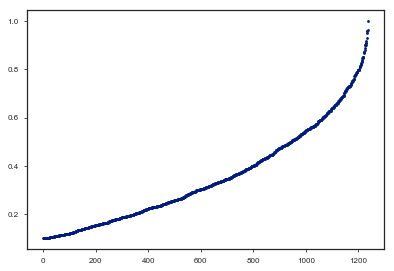

In [1103]:
plt.plot(np.arange(len(Conn_list)),np.sort(GOX_conn[GOX_conn[Gene_int]>tau_lim][Gene_int].tolist()),'.')

In [1104]:
# Send these data to Network plot to generate figures
Plot_gene_list = Conn_list.merge(PT3_DN_Group, how = 'inner', left_index=True, right_index=True).fillna('Unkonwn')
Plot_gene_list = Plot_gene_list.sort_values(Gene_int)
Plot_gene_list = Plot_gene_list[Plot_gene_list.Class != 'Unkonwn']
Group_list = set(Plot_gene_list.Class)

In [1105]:
Plot_gene_list = Plot_gene_list[[Gene_int,'Class']]

In [1106]:
Distribution_gene_list = Plot_gene_list.sort_values('Phatr3_J50804',ascending=False)
Distribution_gene_list = Plot_gene_list.sort_values('Class')

In [1107]:
cid_list = []
for cid in set(Distribution_gene_list.Class):
    if len(Distribution_gene_list[Distribution_gene_list.Class == cid]) > 20:
        cid_list.append(cid)

fig_nums = len(cid_list)

In [1108]:
binBoundaries = np.linspace(0.1,1,20)

In [1109]:
Gene_sort_list = Distribution_gene_list.sort_values('Phatr3_J50804',ascending=False)

In [1081]:
# CDF cumulative density function
# Kolmogrov K test

In [1082]:
count

9

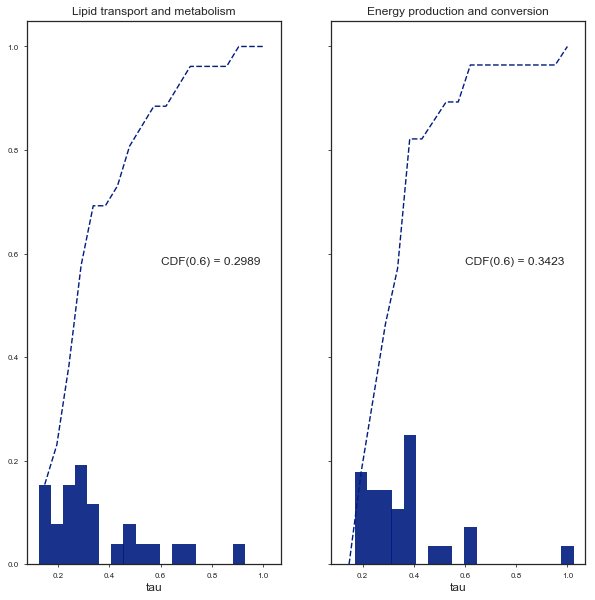

In [1083]:
fig,ax = plt.subplots(round(fig_nums/2),2,figsize = (10,10),sharex='col', sharey='row')
ax = ax.ravel()
for count,cid in enumerate(cid_list):
    data = Distribution_gene_list[Distribution_gene_list.Class == cid].Phatr3_J50804
    hist, bin_edges = np.histogram(data, normed=True,bins = binBoundaries)
    hist = hist/sum(hist)
    ax[count].bar(list(bin_edges[1:]),list(hist),0.048,alpha=0.9)# align = 'left')
    # ax[count].hist(hist,bins = binBoundaries)
    # ax[count].plot(bin_data[1][1:],bin_data[0]/sum(bin_data[0]),'.')
    # ax[count].set_xlabel((cid,moment(bin_data[0]/sum(bin_data[0]),moment=3)))
    ax[count].set_title((cid))
    cdf = np.cumsum(hist)
    # Use interpolation to target where CDF == 0.5
    f = interp1d(list(cdf), list(bin_edges[1:]))
    ax[count].text(0.6,0.58,"CDF(0.6) = %.4f" %f(0.6))
    
    # cdf = norm.cdf(bin_data[0])
    ax[count].plot(bin_edges[1:],cdf,'--')
ax[round(count-1)].set_xlabel('tau')
ax[count].set_xlabel('tau')

In [856]:
fig,ax = plt.subplots(fig_nums,1,figsize = (6,16),sharex=True)
for count,cid in enumerate(cid_list):
    data = Distribution_gene_list[Distribution_gene_list.Class == cid].Phatr3_J50804
    hist, bin_edges = np.histogram(data, normed=True,bins = binBoundaries)
    hist = hist/sum(hist)
    ax[count].bar(list(bin_edges[1:]),list(hist),0.048,alpha=0.9)# align = 'left')
    # ax[count].hist(hist,bins = binBoundaries)
    # ax[count].plot(bin_data[1][1:],bin_data[0]/sum(bin_data[0]),'.')
    # ax[count].set_xlabel((cid,moment(bin_data[0]/sum(bin_data[0]),moment=3)))
    ax[count].set_title((cid))
    cdf = np.cumsum(hist)
    # Use interpolation to target where CDF == 0.5
    f = interp1d(list(cdf), list(bin_edges[1:]))
    ax[count].text(0.8,0.58,"CDF(0.6) = %.4f" %f(0.6))
    # cdf = norm.cdf(bin_data[0])
    ax[count].plot(bin_edges[1:],cdf,'--')

IndexError: index out of range

In [1084]:
# Here I add the genes to their corresponding pathway

Pathway_list = list(set(PT3_DN_Group.Class.fillna('Unkonwn')))
pathway_gene = []
for pid in Pathway_list:
    pathway_gene.append(Plot_gene_list[Plot_gene_list.Class == pid].index.tolist())
Pathway_dict = dict(zip(Pathway_list,pathway_gene))
save_obj(Pathway_dict,'/Users/niudu/Library/Mobile Documents/com~apple~CloudDocs/Dissertation/Jupyter_notebook/System_bio/Annotation/Pathway_dict.pkl')
adjacency_list = dict(zip(Plot_gene_list.index,Plot_gene_list[Gene_int]))
save_obj(adjacency_list,'/Users/niudu/Library/Mobile Documents/com~apple~CloudDocs/Dissertation/Jupyter_notebook/System_bio/Annotation/adjacency_list.pkl')

In [352]:
### Below are methods that I did not use ###

# Here calculates the occurance of sepcific genes that are associated with certain pathways,
# based on the weighted adjacency table

Conn_list_1 = GOX_conn[GOX_conn['Phatr3_J50804'] > 0.75].index
Conn_list_2 = GOX_conn[GOX_conn['Phatr3_J50804'].between(0.5,0.75)].index
Conn_list_3 = GOX_conn[GOX_conn['Phatr3_J50804'].between(0.25,0.5)].index

def count_occurance(Conn_list):
    Pathway_list = []
    for gid in Conn_list:
        Pathway_list.append(find_key(Pathway_dict,gid)) # from the pathway dict to find the gene correspondant pathway 
    Occurance_table = pd.DataFrame(index = list(set(Pathway_list))) 
    Occurance_table['counts'] = 0
    for pathway_id in Pathway_list:
        Occurance_table['counts'].loc[pathway_id]+=1    
    return Occurance_table

count_1 = count_occurance(Conn_list_1)
count_1.columns = ['Layer_1']
count_2 = count_occurance(Conn_list_2)
count_2.columns = ['Layer_2']
count_3 = count_occurance(Conn_list_3)
count_3.columns = ['Layer_3']

count_table = count_1.merge(count_2.merge(count_3,left_index = True,right_index = True,how = 'outer'),left_index = True,right_index = True,how = 'outer')
count_table = count_table.drop(np.nan)

/Volumes/Files/App/anaconda/lib/python3.5/site-packages/pandas/core/reshape/merge.py:722: RuntimeWarning: unorderable types: NoneType() < str(), sort order is undefined for incomparable objects
  sort=self.sort)


In [360]:
def count_occurance(Conn_list):
    Occuring_dict = {}
    for gid in Conn_list_2:
        Target_pathway = find_key(Pathway_dict,gid)
        if Target_pathway is not None:
            Occuring_dict[gid] = Target_pathway
    return Occuring_dict

In [363]:
Conn_list_1 = GOX_conn[GOX_conn['Phatr3_J50804'] > 0.75].index
Conn_list_2 = GOX_conn[GOX_conn['Phatr3_J50804'].between(0.5,0.75)].index
Conn_list_3 = GOX_conn[GOX_conn['Phatr3_J50804'].between(0.25,0.5)].index

Occuring_dict_1 = count_occurance(Conn_list_1)
Occuring_dict_2 = count_occurance(Conn_list_2)
Occuring_dict_3 = count_occurance(Conn_list_3)

set(Occuring_dict_1.values())


{'C_fixation_list',
 'Lipid_related_list',
 'N_assim_list',
 'Photosynthesis_related_list'}

In [323]:
count_table_ratio = count_table
for pid in count_table.index:
    count_table_ratio['Layer_1'].loc[pid] = count_table['Layer_1'].loc[pid]/Pathway_dict_count[pid]
    count_table_ratio['Layer_2'].loc[pid] = count_table['Layer_2'].loc[pid]/Pathway_dict_count[pid]
    count_table_ratio['Layer_3'].loc[pid] = count_table['Layer_3'].loc[pid]/Pathway_dict_count[pid]

/Volumes/Files/App/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [336]:
count_table

,Layer_1,Layer_2,Layer_3
Lipid_related_list,5.0,22.0,35
C_fixation_list,1.0,6.0,11
Photosynthesis_related_list,NaN,4.0,11
N_assim_list,NaN,1.0,4
Ribo_Structure_list,NaN,NaN,1


In [337]:
save_obj(count_table_ratio,'./Chapter_I_modeling/Transcript/count_table_ratio.pkl')
save_obj(Pathway_dict,'./Chapter_I_modeling/Transcript/Pathway_dict.pkl')
save_obj(count_table,'./Chapter_I_modeling/Transcript/count_table.pkl')

In [ ]:
### Below are additional calculations not used ###

In [409]:
# Sara's data
data_dist = Sara_data_all.as_matrix()
Sample_ids = Sara_data_all.index

In [48]:
data_link = linkage(data_dist,'ward')

In [12]:
# Flip WT N-free wash
data_dist = Weight_Corr_Flip.as_matrix()
Sample_ids = Weight_Corr_Flip.index

In [107]:
GOX_related_list = Sara_data_all[['Phatr3_J50804']].sort_values('Phatr3_J50804',ascending = False)[0:100].index

/Volumes/Files/App/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:17: RuntimeWarning: divide by zero encountered in log10
/Volumes/Files/App/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3082: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


In [410]:
testing = Finding_tau(data_dist)

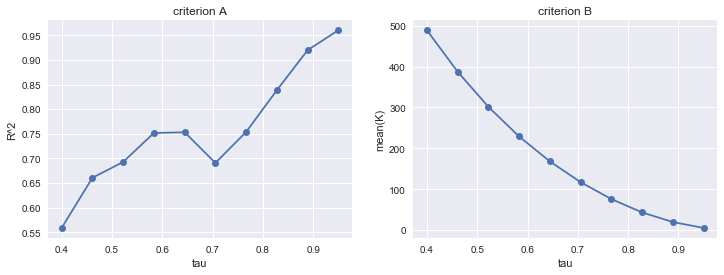

In [411]:
f,ax = plt.subplots(1,2,figsize = (12,4))
ax[0].plot(testing[0],testing[1],'o-')
ax[1].plot(testing[0],testing[2],'o-')
ax[0].set_title('criterion A')
ax[1].set_title('criterion B')
ax[0].set_xlabel('tau')
ax[0].set_ylabel('R^2')
ax[1].set_xlabel('tau')
ax[1].set_ylabel('mean(K)')

In [ ]:
# From the criterion A we select tau = 0.7 
K_unweighted = K_binary(data_dist,0.9)

In [110]:
K_unweighted = K_binary(GOX_sub_matrix,0.0)

In [111]:
unique, counts = np.unique(K_unweighted, return_counts=True)

/Volumes/Files/App/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log10
/Volumes/Files/App/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log10
/Volumes/Files/App/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3082: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


GOF =  nan


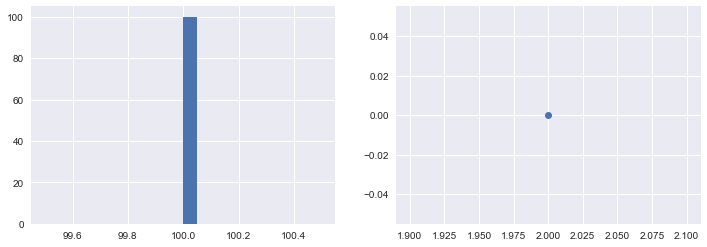

In [140]:
f,ax = plt.subplots(1,2,figsize = (12,4))
hist_data = ax[0].hist(K_unweighted,bins=20)
p_K = hist_data[0]/sum(hist_data[0]) # propotion of nodes that have connectivity k
ax[1].plot(np.log10(hist_data[1][1:]),np.log10(p_K),'o')
fitting = linregress(np.log10(hist_data[1][1:]),np.log10(p_K))
ax[1].plot(np.log10(hist_data[1][1:]),np.log10(hist_data[1][1:])*fitting.slope+fitting.intercept)
print('GOF = ',fitting.rvalue**2)

In [ ]:
f,ax = plt.subplots(1,2,figsize = (12,4))
hist_data = ax[0].hist(K,bins=20)
ax[1].plot(np.log10(K),np.log10(10**(-K)),'o')
fitting = linregress(np.log10(hist_data[1][1:]),np.log10(hist_data[0]))
ax[1].plot(np.log10(hist_data[1][1:]),np.log10(hist_data[1][1:])*fitting.slope+fitting.intercept)
print('GOF = ',fitting.rvalue**2)

In [ ]:
# Weighted network
K = sum(data_dist)


In [ ]:

fitting = linregress(np.log10(hist_data[1][1:]),np.log10(hist_data[0]))

In [ ]:
fitting.rvalue**2

In [ ]:
hist_data[0]

In [ ]:
hist_data[1][1:]

In [ ]:
plt.plot(hist_data[0],hist_data[1])

In [ ]:
C1 = dendrogram(data_link, labels=Sample_ids, color_threshold=6)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.suptitle('Samples clustering', fontweight='bold', fontsize=14);

In [ ]:
from scipy import cluster
def cut_dendrogram(Z, C1, sample_ids, height):
    return pd.Series(cluster.hierarchy.cut_tree(Z, height=height).ravel(), index=sample_ids, name="clusters")[C1["ivl"]]#.sort_values()
#cut_dendrogram(data_link, C1, Sample_ids, 6)


In [ ]:
# Compute and plot first dendrogram.
fig = plt.figure(figsize=(8,8))
# x ywidth height
ax1 = fig.add_axes([0.05,0.1,0.2,0.6])
# Y = linkage(data_dist, method='ward')
Z1 = dendrogram(data_link, orientation='right',labels=Sample_ids) # adding/removing the axes
ax1.set_xticks([])

# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3,0.71,0.6,0.1])
Z2 = dendrogram(data_link)
ax2.set_xticks([])
ax2.set_yticks([])

#Compute and plot the heatmap
axmatrix = fig.add_axes([0.3,0.1,0.75,0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
D = data_dist
D = D[idx1,:]
D = D[:,idx2]
im = sns.heatmap(np.flip(D,0))#, aspect='auto', origin='lower', cmap=plt.cm.YlGnBu)
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# Plot colorbar.
#axcolor = fig.add_axes([0.91,0.1,0.02,0.6])
# plt.colorbar(im, cax=axcolor)

In [ ]:
import networkx as nx
from gtom import gtom

In [ ]:
G = nx.Graph()
G.add_edges_from([(0,1),(1,2),(0,3),(0,4),(0,5),(0,7),
                  (1,3),(1,4),(1,6),(1,8),(1,9),(1,10),
                  (5,6),(7,8)])


In [ ]:
N = G.number_of_nodes()
A = nx.to_scipy_sparse_matrix(G)


In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(Weight_Corr_Sara)

In [ ]:
Sara_data.columns

In [ ]:
Sara_data[['H_10AM', 'H_2PM', 'H_6PM', 'H_10PM','H_2AM', 'H_6AM']]

In [ ]:
# K-mean

import numpy as np
 
def cluster_points(X, mu):
    clusters  = {}
    for x in X:
        bestmukey = min([(i[0], np.linalg.norm(x-mu[i[0]]))
                    for i in enumerate(mu)], key=lambda t:t[1])[0]
        try:
            clusters[bestmukey].append(x)
        except KeyError:
            clusters[bestmukey] = [x]
    return clusters
 
def reevaluate_centers(mu, clusters):
    newmu = []
    keys = sorted(clusters.keys())
    for k in keys:
        newmu.append(np.mean(clusters[k], axis = 0))
    return newmu
 
def has_converged(mu, oldmu):
    return (set([tuple(a) for a in mu]) == set([tuple(a) for a in oldmu]))

def find_centers(X, K):
    # Initialize to K random centers
    oldmu = random.sample(X, K)
    mu = random.sample(X, K)
    while not has_converged(mu, oldmu):
        oldmu = mu
        # Assign all points in X to clusters
        clusters = cluster_points(X, mu)
        # Reevaluate centers
        mu = reevaluate_centers(oldmu, clusters)
    return(mu, clusters)



In [331]:
# This function computes the GTOMm DISSIMILARITY
# Python code generated based on Andy M. Yip and Steve Horvath 2005
# Input:
# - adjmat, a symmetric adjacency matrix with binary entries
# - m, the order of GTOM
#
# Output:
# - The GTOMm dissimilarity matrix

def GTOM(adjmat_binary,m = 1):
    if m!= round(abs(m)):
        return
    if not np.array_equal(adjmat_binary,adjmat_binary.astype(bool)):
        return
    
    B = adjmat_binary
    if m>=2:
        for i in range(1,m):
            B[np.diag_indices_from(B)] += 1
            B = B.dot(adjmat_binary) # number of paths with length at most m connecting each pair
            adjmat_binary[np.diag_indices_from(adjmat_binary)] = 1 # data_dist value is altered in the calculation
    B = np.where(B>0,1,B) # m-step reachability matrix
    B[np.diag_indices_from(B)] = 0        # exclude each node being its own neighbor
    B = B.dot(B)                  # number of common k-step neighbors that each pair of nodes share
    Nk = B[np.diag_indices_from(B)]                 # number of common k-step neighbors that each node possesses
    B = B + adjmat_binary
    B[np.diag_indices_from(B)] = 1